In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score,auc,roc_curve,precision_recall_curve
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier



import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv(r'C:\Users\win10\Downloads\archive (4)\heart.csv')

In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
df.shape

(303, 14)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [48]:
df.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [49]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [52]:
df.drop_duplicates(inplace = True)

In [53]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 1.27940164122047
Q3: 127.0
Q1: 0.5192629669603347
IQR: 126.48073703303966


In [61]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [62]:
upper_array = np.where(df.describe() >= upper)[0]
lower_array = np.where(df.describe() <= lower)[0]
 

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (301, 14)


In [63]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)

skewness: [2.03445598 2.26771651 2.2673919  0.60634782 0.92045805 2.26773959
 2.26761987 0.28749087 2.26771746 2.2662159  2.26760478 2.26709539
 2.26733118 2.26771733]


In [64]:
log_transformed_data = np.log(skew)

In [65]:
print('skewness:',log_transformed_data)

skewness: [ 0.71022845  0.81877338  0.81863023 -0.5003015  -0.08288385  0.81878356
  0.81873077 -1.24656417  0.8187738   0.81811143  0.81872411  0.81849945
  0.81860345  0.81877374]


In [74]:
corre=stats.spearmanr(df)

In [75]:
corre

SignificanceResult(statistic=array([[ 1.        , -0.09379055, -0.08186557,  0.28768062,  0.19138049,
         0.11067727, -0.12510806, -0.38977882,  0.08375803,  0.26012417,
        -0.17608026,  0.35280872,  0.08919304, -0.23200892],
       [-0.09379055,  1.        , -0.06515269, -0.05264598, -0.14976637,
         0.04702128, -0.05280031, -0.04697423,  0.14527408,  0.10689645,
        -0.02988456,  0.11785782,  0.25054578, -0.28631168],
       [-0.08186557, -0.06515269,  1.        ,  0.03418144, -0.08741139,
         0.09161405,  0.06223235,  0.3215653 , -0.41715813, -0.1582502 ,
         0.15624778, -0.22437207, -0.20767467,  0.45955582],
       [ 0.28768062, -0.05264598,  0.03418144,  1.        ,  0.13177664,
         0.15208083, -0.12563255, -0.03952813,  0.05226652,  0.15421494,
        -0.08620705,  0.08521408,  0.06422231, -0.12126085],
       [ 0.19138049, -0.14976637, -0.08741139,  0.13177664,  1.        ,
         0.0171569 , -0.16010256, -0.04199698,  0.08976918,  0.0417487

In [76]:
corre  = df.values.reshape((2, -1))

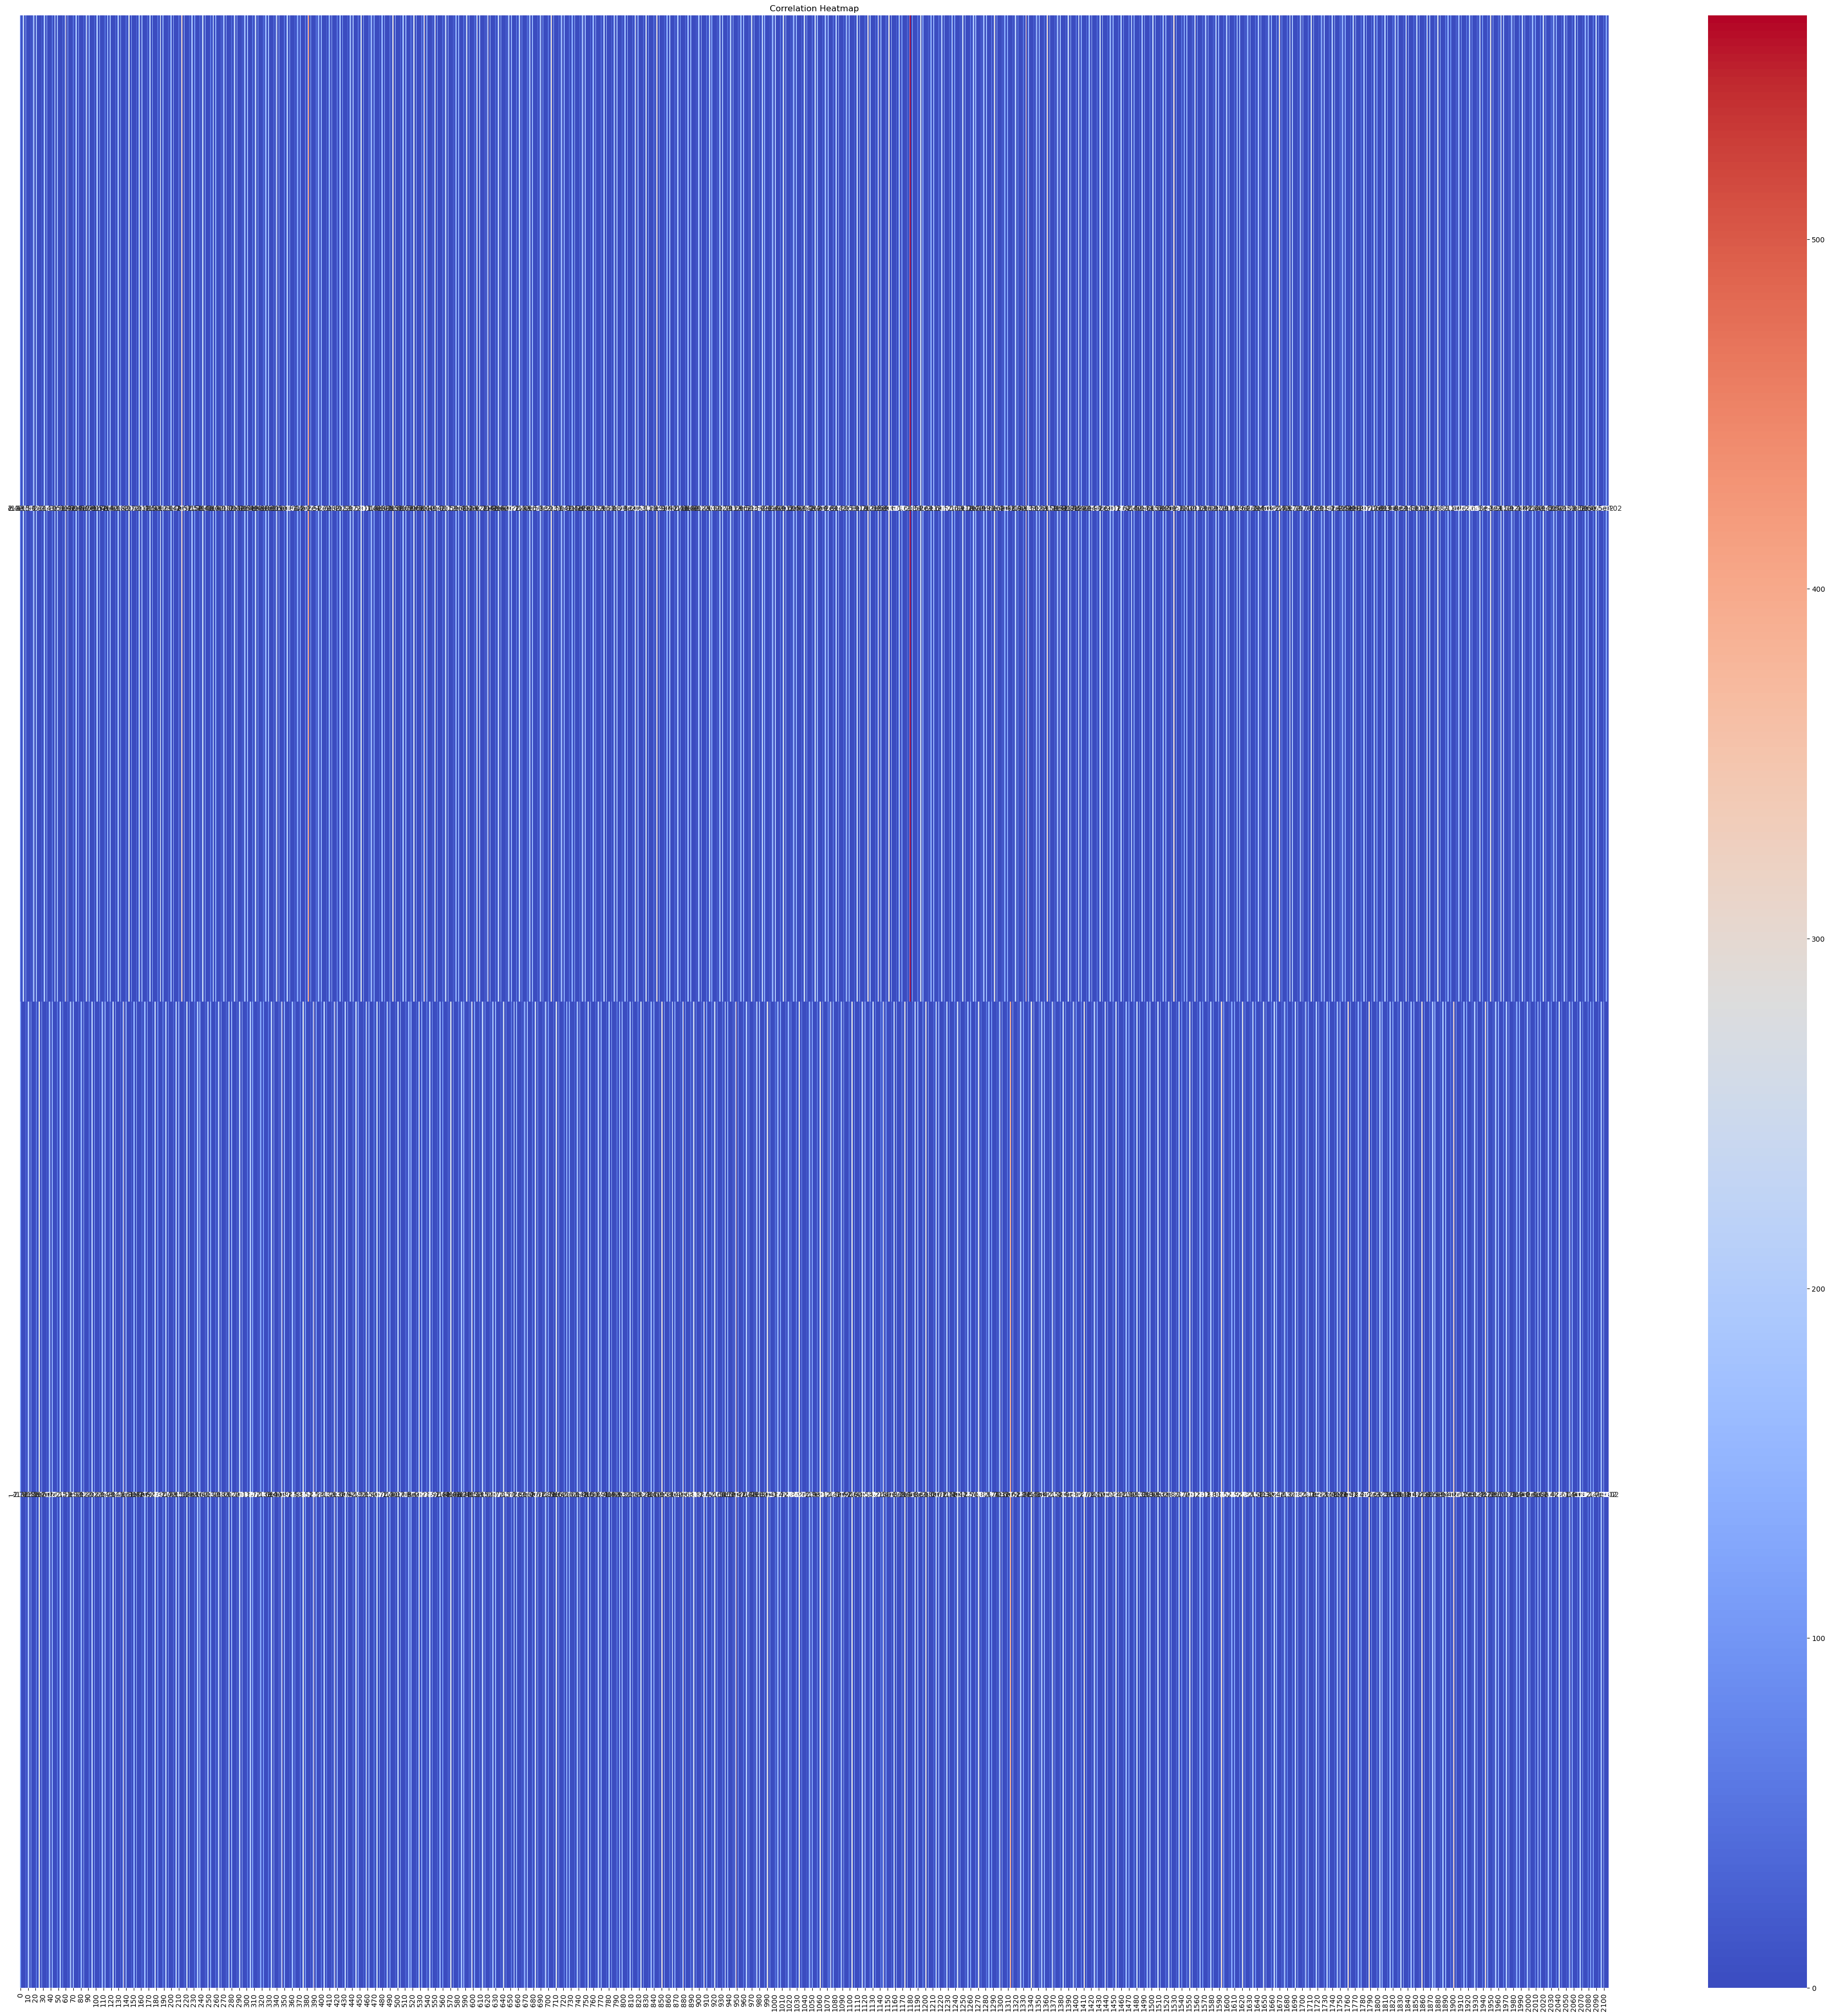

In [78]:
# Set up the matplotlib figure
plt.figure(figsize=(50,50))

# Plot the heatmap
sns.heatmap(corre,annot=True,cmap="coolwarm") 

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [80]:
corre.shape

(2, 2107)

In [83]:
from sklearn.decomposition import PCA

# Assuming 'corre' is your correlation matrix

# Define the desired dimensionality after reduction
desired_dimension = 2  # Adjust this value as needed

# Perform PCA for dimensionality reduction
pca = PCA(n_components=desired_dimension)
reduced_corre = pca.fit_transform(corre)

# Dimension of the reduced correlation matrix
print("Dimension of reduced correlation matrix:", reduced_corre.shape)


Dimension of reduced correlation matrix: (2, 2)


In [84]:
reduced_corre

array([[ 2.60153745e+03,  1.03154110e-13],
       [-2.60153745e+03,  1.03154110e-13]])

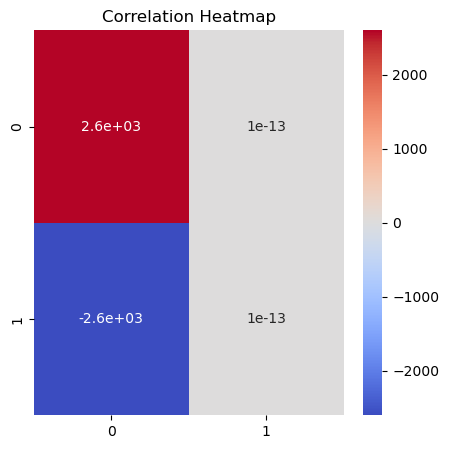

In [87]:
plt.figure(figsize=(5,5))

# Plot the heatmap
sns.heatmap(reduced_corre,annot=True,cmap="coolwarm") 

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [88]:
df_subset=df[['age','sex','target']]

In [89]:
%matplotlib inline

Text(0.5, 1.0, "Histogram with pdf for feature 'target'")

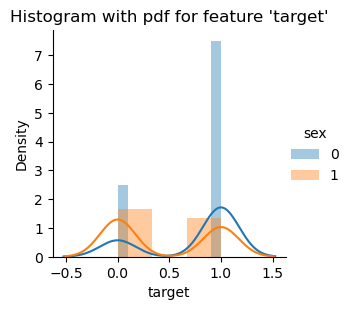

In [90]:
sns.FacetGrid(df_subset,hue='sex').map(sns.distplot,'target').add_legend()
plt.title("Histogram with pdf for feature 'target'")

<Axes: xlabel='target', ylabel='age'>

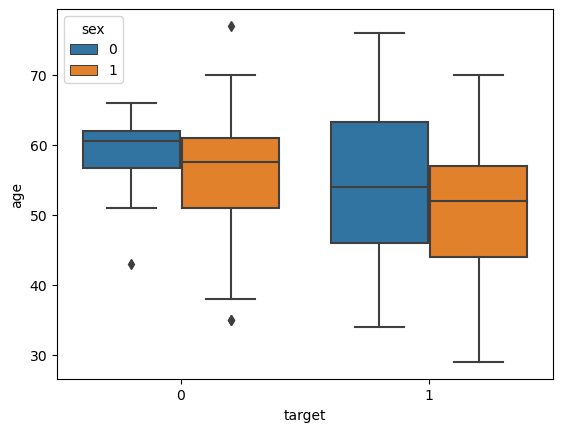

In [91]:
sns.boxplot(data=df_subset,x='target', y='age',hue='sex')

<Axes: xlabel='target', ylabel='age'>

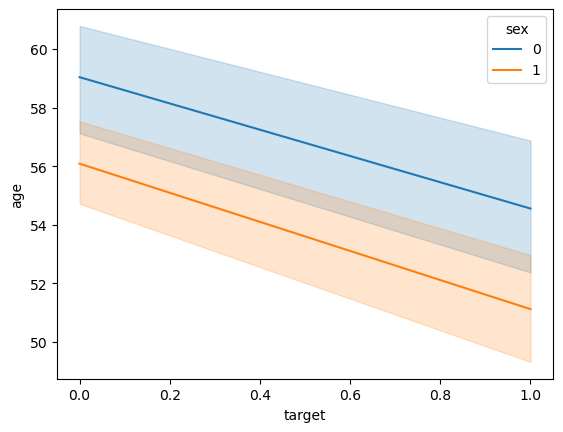

In [92]:
sns.lineplot(data=df_subset,x='target', y='age',hue='sex')

<Axes: xlabel='target', ylabel='age'>

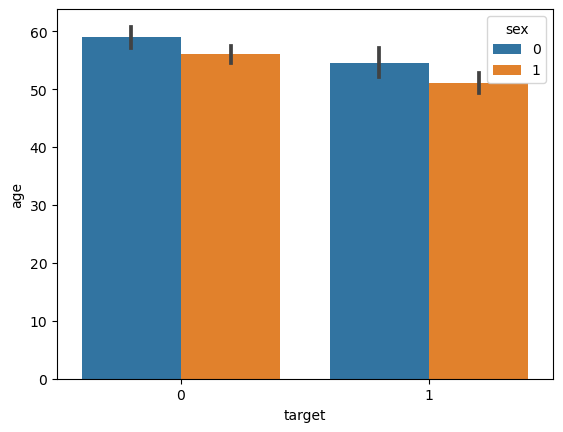

In [93]:
sns.barplot(data=df_subset,x='target', y='age',hue='sex')

<Axes: xlabel='target', ylabel='age'>

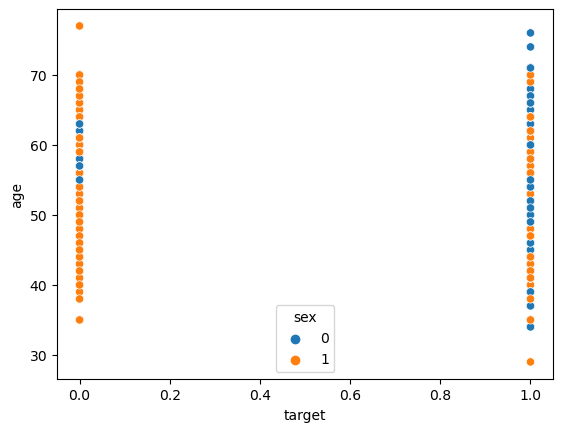

In [94]:
sns.scatterplot(data=df_subset,x='target', y='age',hue='sex')

<Axes: xlabel='target', ylabel='age'>

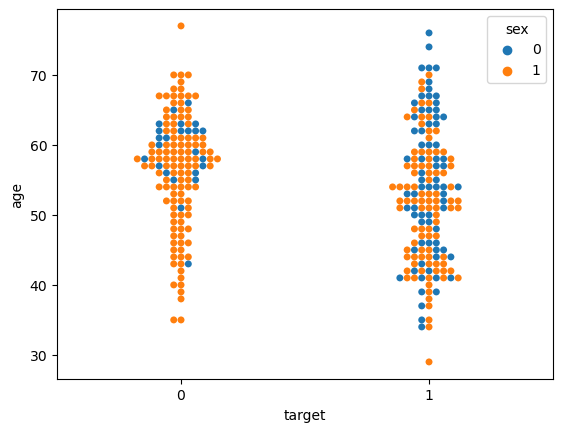

In [95]:
sns.swarmplot(data=df_subset,x='target', y='age',hue='sex')

<Axes: xlabel='target', ylabel='age'>

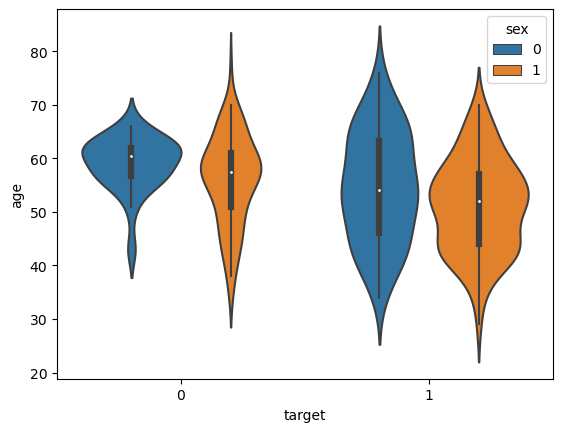

In [96]:
sns.violinplot(data=df_subset,x='target', y='age',hue='sex')

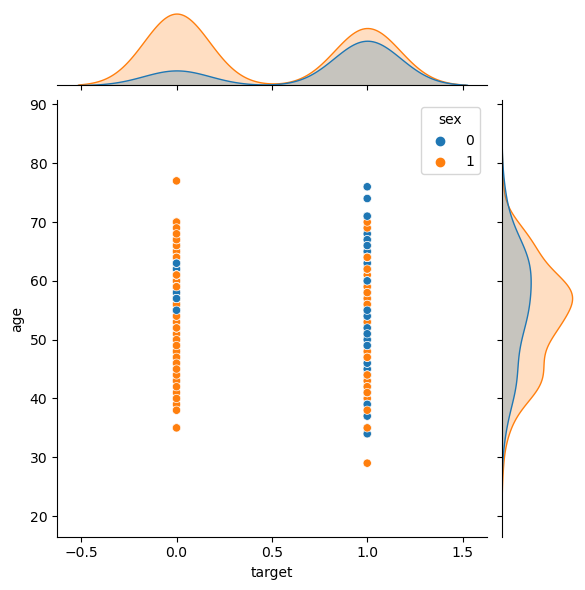

In [97]:
sns.jointplot(data=df_subset,x='target', y='age',hue='sex')

In [181]:
y=df['target']
x=df.drop(['target'], axis=1)

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=88)

In [183]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train1, y_train1 = sm.fit_resample(x_train, y_train.ravel())

In [184]:
print('After OverSampling, the shape of train_X: {}'.format(x_train1.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train1.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train1 == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train1 == 0)))

After OverSampling, the shape of train_X: (258, 13)
After OverSampling, the shape of train_y: (258,) 

After OverSampling, counts of label '1': 129
After OverSampling, counts of label '0': 129


In [185]:
sc= StandardScaler()

In [186]:
x_train=sc.fit_transform(x_train1)
x_test=sc.fit_transform(x_test)

In [187]:
svcm=SVC(kernel='linear')

In [188]:
svcm.fit(x_train,y_train1)

SVC(kernel='linear')

In [189]:
y_pred=svcm.predict(x_test)

In [190]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.8360655737704918


In [191]:
print('Accuracy score: {:.2f}%'.format(acc*100))

Accuracy score: 83.61%


In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [193]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[22  5]
 [ 5 29]]


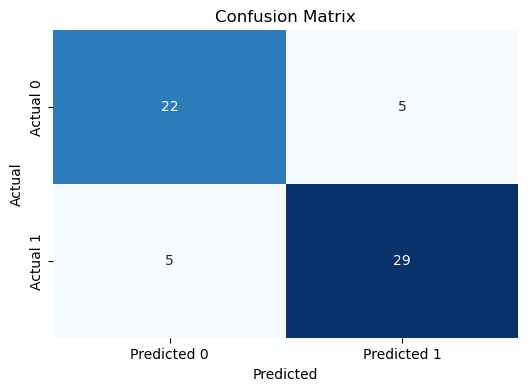

In [194]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [195]:
yb=label_binarize(y,classes=[0,1,2])

In [155]:
classifier=OneVsOneClassifier(SVC(kernel='linear',probability=True,random_state=42))

In [196]:
y_score=classifier.fit(x_train,y_train1).decision_function(x_test)

In [197]:
yb1=yb.shape[1]

In [198]:
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(yb1):
    fpr[i],tpr[i], _ = roc_curve(y_test==i,y_score[:])
    roc_auc[i]=auc(fpr[i],tpr[i])

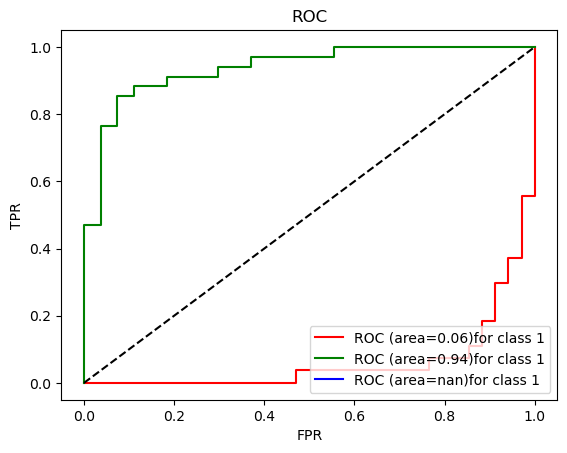

In [199]:
plt.figure()
color=['red','green','blue']

for i ,color in zip(range(yb1),color):
    plt.plot(fpr[i],tpr[i],color=color,
            label='ROC (area={:.2f})for class {}'.format(roc_auc[i],df.target[i]))
plt.plot([0,1], [0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [200]:
precision=dict()
recall=dict()
threshold=dict()

for i in range(yb1):
    precision[i],recall[i], _ = precision_recall_curve(y_test==i,y_score[:])

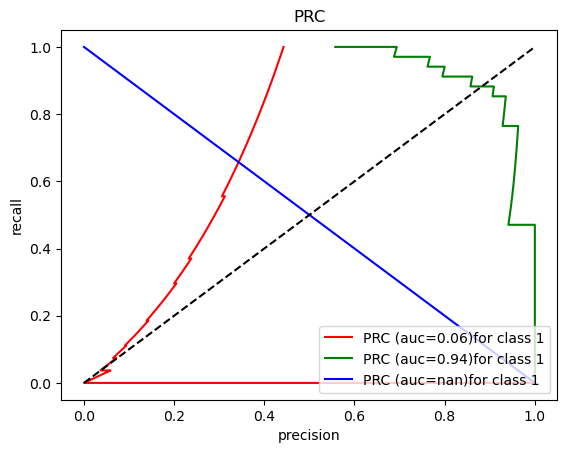

In [201]:
plt.figure()
color=['red','green','blue']

for i ,color in zip(range(yb1),color):
    plt.plot(precision[i],recall[i],color=color,
            label='PRC (auc={:.2f})for class {}'.format(roc_auc[i],df.target[i]))
plt.plot([0,1], [0,1],'k--')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('PRC')
plt.legend(loc='lower right')
plt.show()

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=88)

In [203]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train1, y_train1 = sm.fit_resample(x_train, y_train.ravel())

In [204]:
print('After OverSampling, the shape of train_X: {}'.format(x_train1.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train1.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train1 == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train1 == 0)))

After OverSampling, the shape of train_X: (258, 13)
After OverSampling, the shape of train_y: (258,) 

After OverSampling, counts of label '1': 129
After OverSampling, counts of label '0': 129


In [205]:
sc= StandardScaler()

In [206]:
x_train=sc.fit_transform(x_train1)
x_test=sc.fit_transform(x_test)

In [207]:
svcm=SVC(kernel='sigmoid')

In [208]:
svcm.fit(x_train,y_train1)

SVC(kernel='sigmoid')

In [209]:
y_pred=svcm.predict(x_test)

In [210]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.8688524590163934


In [211]:
print('Accuracy score: {:.2f}%'.format(acc*100))

Accuracy score: 86.89%


In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [213]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[22  5]
 [ 3 31]]


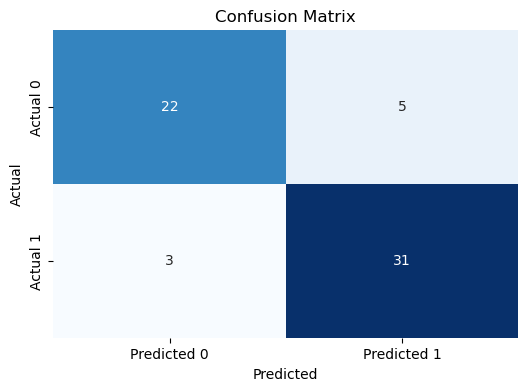

In [214]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [215]:
yb=label_binarize(y,classes=[0,1,2])

In [173]:
classifier=OneVsOneClassifier(SVC(kernel='sigmoid',probability=True,random_state=42))

In [216]:
y_score=classifier.fit(x_train,y_train1).decision_function(x_test)

In [217]:
yb1=yb.shape[1]

In [218]:
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(yb1):
    fpr[i],tpr[i], _ = roc_curve(y_test==i,y_score[:])
    roc_auc[i]=auc(fpr[i],tpr[i])

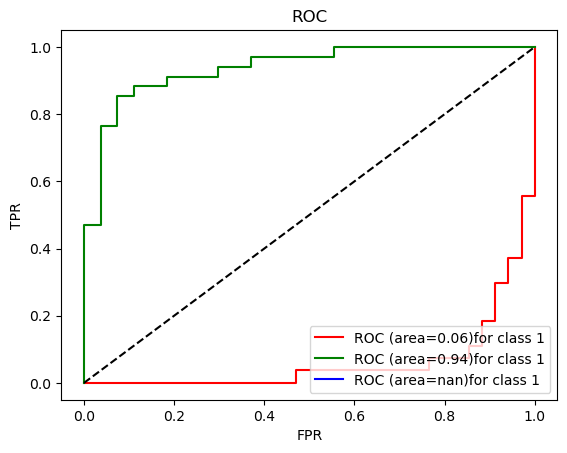

In [219]:
plt.figure()
color=['red','green','blue']

for i ,color in zip(range(yb1),color):
    plt.plot(fpr[i],tpr[i],color=color,
            label='ROC (area={:.2f})for class {}'.format(roc_auc[i],df.target[i]))
plt.plot([0,1], [0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [220]:
precision=dict()
recall=dict()
threshold=dict()

for i in range(yb1):
    precision[i],recall[i], _ = precision_recall_curve(y_test==i,y_score[:])

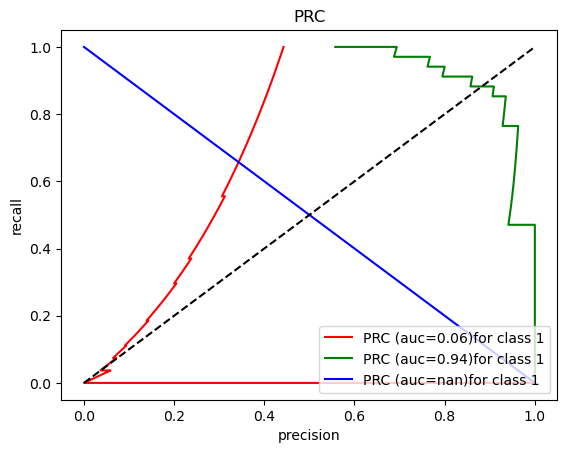

In [221]:
plt.figure()
color=['red','green','blue']

for i ,color in zip(range(yb1),color):
    plt.plot(precision[i],recall[i],color=color,
            label='PRC (auc={:.2f})for class {}'.format(roc_auc[i],df.target[i]))
plt.plot([0,1], [0,1],'k--')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('PRC')
plt.legend(loc='lower right')
plt.show()